In [17]:
# Load the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

counts = pd.read_parquet("../data/dlbc_star_counts.parquet")
counts.shape

(60660, 48)

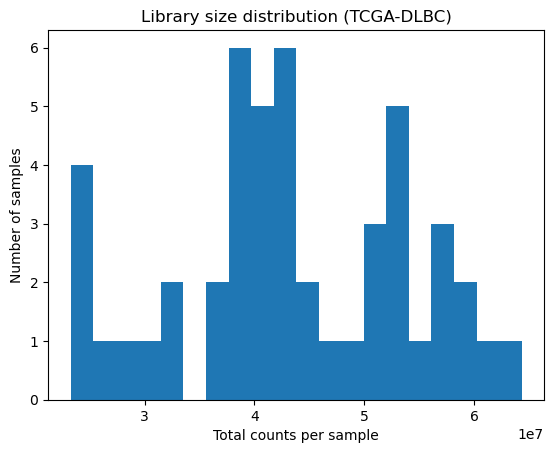

In [18]:
library_sizes = counts.sum(axis=0)

plt.figure()
library_sizes.plot(kind="hist", bins=20)
plt.xlabel("Total counts per sample")
plt.ylabel("Number of samples")
plt.title("Library size distribution (TCGA-DLBC)")
plt.show()

In [19]:
# filter low expression genes
gene_filter = (counts >= 10).sum(axis=1) >= 5
counts_filt = counts.loc[gene_filter]

counts.shape, counts_filt.shape

#Genes with fewer than 10 counts in at least 5 samples were
#removed to reduce noise from lowly expressed genes. This filtering
#step reduced the dataset from 60,660 to 23,920 genes while retaining all samples.

((60660, 48), (23920, 48))

In [20]:
# normalize
cpm = counts_filt.div(counts_filt.sum(axis=0), axis=1) * 1e6
log_cpm = np.log2(cpm + 1)

#Raw RNA-seq counts are influenced by both gene expression levels
#and sample-specific sequencing depth, making them not directly comparable across samples. 
#To account for differences in library size, counts were normalized to counts per million (CPM), 
#which scales each sample to the same total sequencing depth. 
#A log₂(CPM + 1) transformation was then applied to reduce skewness and stabilize variance, 
#resulting in expression values that are more suitable for visualization, clustering, and 
#predictive modeling.

In [22]:
log_cpm.to_parquet("../data/dlbc_log_cpm.parquet")